# 图像的基本操作

### 目标

学会：
- 访问像素值并修改它们
- 访问图像属性
- 设置感兴趣区域(ROI)
- 分割和合并图像

本节中的几乎所有操作都主要与Numpy相关，而不是与OpenCV相关。要使用OpenCV编写更好的优化代码，需要Numpy的丰富知识。

*（由于大多数示例都是单行代码，因此示例将在Python终端中显示）*

### 访问和修改像素值
让我们先加载彩色图像：

In [1]:
import numpy as np
import cv2 as cv

img = cv.imread('data/messi5.jpg')

你可以通过行和列坐标来访问像素值。对于 BGR 图像，它返回一个由蓝色、绿色和红色值组成的数组。对于灰度图像，只返回相应的灰度。

In [2]:
px = img[100,100]
print( px )

[157 166 200]


In [3]:
blue = img[100,100,0]
print( blue )

157


你可以用相同的方式修改像素值。

In [4]:
img[100,100] = [255,255,255]
print( img[100,100] )

[255 255 255]


**警告**

Numpy是用于快速数组计算的优化库。因此，简单地访问每个像素值并对其进行修改将非常缓慢，因此不建议使用。

> **注意**
  上面的方法通常用于选择数组的区域，例如前5行和后3列。对于单个像素访问，Numpy数组方法array.item()和array.itemset())被认为更好，但是它们始终返回标量。如果要访问所有B，G，R值，则需要分别调用所有的array.item()。

更好的像素访问和编辑方法：

In [5]:
img.item(10,10,2)

59

In [6]:
img.itemset((10,10,2),100)
img.item(10,10,2)

100

### 访问图像属性

图像属性包括行数，列数和通道数，图像数据类型，像素数等。

图像的形状可通过`img.shape`访问。它返回行，列和通道数的元组（如果图像是彩色的）：

In [7]:
print( img.shape )

(342, 548, 3)


> **注意**
> 如果图像是灰度的，则返回的元组仅包含行数和列数，因此这是检查加载的图像是灰度还是彩色的好方法。

像素总数可通过访问`img.size`：

In [8]:
print( img.size )

562248


图像数据类型通过`img.dtype`获得：

In [9]:
print( img.dtype )

uint8


> **注意**
  img.dtype在调试时非常重要，因为OpenCV-Python代码中的大量错误是由无效的数据类型引起的。

### 图像感兴趣区域ROI

有时候，你不得不处理一些特定区域的图像。对于图像中的眼睛检测，首先对整个图像进行人脸检测。在获取人脸图像时，我们只选择人脸区域，搜索其中的眼睛，而不是搜索整个图像。它提高了准确性(因为眼睛总是在面部上:D )和性能(因为我们搜索的区域很小)。

使用Numpy索引再次获得ROI。在这里，我要选择球并将其复制到图像中的另一个区域：

In [10]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball 

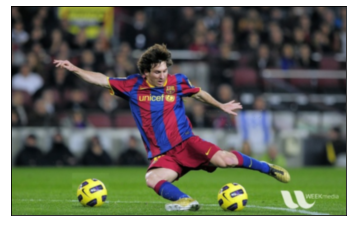

In [11]:
from matplotlib import pyplot as plt

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # 隐藏 x 轴和 y 轴上的刻度值
plt.show()

### 拆分和合并图像通道

有时你需要分别处理图像的B，G，R通道。在这种情况下，你需要将BGR图像拆分为单个通道。在其他情况下，你可能需要将这些单独的频道加入BGR图片。你可以通过以下方式简单地做到这一点：

In [12]:
b,g,r = cv.split(img)
img = cv.merge((b,g,r))

要么

In [13]:
b = img [:, :, 0]

假设你要将所有红色像素都设置为零，则无需先拆分通道。numpy索引更快：

In [14]:
img [:, :, 2] = 0

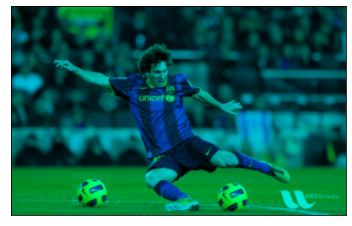

In [15]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # 隐藏 x 轴和 y 轴上的刻度值
plt.show()

**警告**

`cv.split()`是一项耗时的操作（就时间而言）。因此，仅在必要时才这样做。否则请进行Numpy索引。

### 为图像设置边框（填充）

如果要在图像周围创建边框（如相框），则可以使用`cv.copyMakeBorder()`。但是它在卷积运算，零填充等方面有更多应用。此函数采用以下参数：

- **src** - 输入图像

- **top**，**bottom**，**left**，**right** 边界宽度（以相应方向上的像素数为单位）

- **borderType** - 定义要添加哪种边框的标志。它可以是以下类型：
  - **cv.BORDER_CONSTANT** - 添加恒定的彩色边框。该值应作为下一个参数给出。
  - **cv.BORDER_REFLECT** - 边框将是边框元素的镜像，如下所示： *fedcba | abcdefgh | hgfedcb*
  - **cv.BORDER_REFLECT_101**或 **cv.BORDER_DEFAULT**与上述相同，但略有变化，例如： *gfedcb | abcdefgh | gfedcba*
  - **cv.BORDER_REPLICATE**最后一个元素被复制，像这样： *aaaaaa | abcdefgh | hhhhhhh*
  - **cv.BORDER_WRAP**难以解释，它看起来像这样： *cdefgh | abcdefgh | abcdefg*

- **value** -边框的颜色，如果边框类型为**cv.BORDER_CONSTANT**

下面是一个示例代码，演示了所有这些边框类型，以便更好地理解：

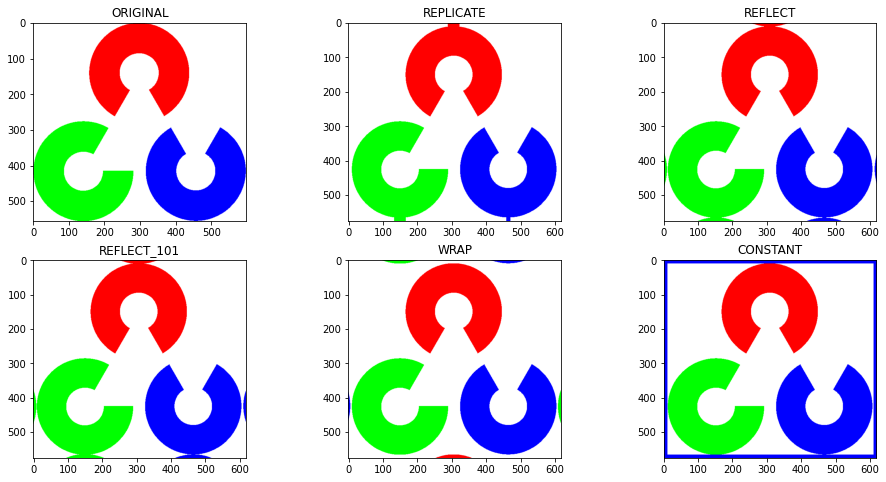

In [16]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv.imread('data/opencv-logo.png')

replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)

plt.figure(figsize=(16, 8))
plt.subplot(231),plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB),'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(cv.cvtColor(replicate, cv.COLOR_BGR2RGB),'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(cv.cvtColor(reflect, cv.COLOR_BGR2RGB),'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(cv.cvtColor(reflect101, cv.COLOR_BGR2RGB),'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(cv.cvtColor(wrap, cv.COLOR_BGR2RGB),'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(cv.cvtColor(constant, cv.COLOR_BGR2RGB),'gray'),plt.title('CONSTANT')

plt.show()

### 其他资源

### 练习题